In this notebook we explore the results of different preprocessing strategies on simulated data

In [2]:
import txsim as tx
import scanpy as sc
import os
import pandas as pd
from anndata import AnnData
import numpy as np
#from scipy.spatial import ConvexHull, convex_hull_plot_2d
import xb.formatting as xf
import seaborn as sns
import random 
import matplotlib.pyplot as plt
import sklearn.metrics as sk
from tqdm import tqdm
import scanpy as sc
import random
from xb.calculating import entropy,compute_vi,compute_fmi
from xb.formatting import keep_nuclei_and_quality
from xb.simulating import missegmentation_simulation,noise_adder,subset_of_single_cell,main_preprocessing, allcombs_simulated

In [4]:
mainpath='../../data/scRNAseq_for_simulations/'
datasets=os.listdir(mainpath)
datasets=[d for d in datasets if d!='.ipynb_checkpoints']
rsimpath='../../data/scRNAseq_for_simulations_Xenium_like/'

In [5]:
datasetdic={}
dats=[]
for d in range(0,len(datasets)):
    print(os.listdir(mainpath+datasets[d]))

['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'quality_variation_results.csv', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['markers.csv', 'original_adata.h5ad', 'reference_allresults.csv']
['clean_allresults.csv', 'final_allresults.csv', 'markers.csv', 'original_adata.h5ad', 'referen

In [6]:
datasetdic={}
dats=[]
available_tiss=[]
for d in range(0,len(datasets)):
    try:
        resul=pd.read_csv(mainpath+datasets[d]+'/final_allresults.csv',index_col=0)
        rres=pd.read_csv(rsimpath+datasets[d]+'/results_clustering.csv',index_col=0)
        resul.columns='SCANPY_'+resul.columns
        rres.columns='SEURAT_'+rres.columns
        adata=sc.read(mainpath+datasets[d]+'/original_adata.h5ad')
        if adata.obs['tissue'][0] not in available_tiss:
            datasetdic[datasets[d]]=adata.obs['tissue'][0]
            available_tiss.append(adata.obs['tissue'][0])
        else:
            tot=np.sum([adata.obs['tissue'][0] in n for n in available_tiss])
            datasetdic[datasets[d]]=adata.obs['tissue'][0]+'_'+str(tot)
            available_tiss.append(adata.obs['tissue'][0]+'_'+str(tot))
    except:
        print(str(d)+' failed')

7 failed
19 failed
20 failed
23 failed
40 failed
41 failed
42 failed
43 failed
44 failed
45 failed
46 failed
47 failed
48 failed


In [7]:
allpos=[]
for d in range(0,len(datasets)):
    try:
        resul=pd.read_csv(mainpath+datasets[d]+'/final_allresults.csv',index_col=0)
        rres=pd.read_csv(rsimpath+datasets[d]+'/results_clustering.csv',index_col=0)
        resul.columns='SCANPY_'+resul.columns
        rres.columns='SEURAT_'+rres.columns
        for el in resul.columns:
            allpos.append(el)
        for el in rres.columns:
            allpos.append(el)
    except:
        E=2

In [8]:
ARI=None
VI=None
fmi=None
if ARI is None:
    ARI=pd.DataFrame(index=np.unique(allpos),columns=datasets)
if VI is None:
    VI=pd.DataFrame(index=np.unique(allpos),columns=datasets)
if fmi is None:
    fmi=pd.DataFrame(index=np.unique(allpos),columns=datasets)

In [9]:
dats=[]
from tqdm import tqdm
for d in tqdm(range(0,len(datasets))):
    try:
        resul=pd.read_csv(mainpath+datasets[d]+'/final_allresults.csv',index_col=0)
        rres=pd.read_csv(rsimpath+datasets[d]+'/results_clustering.csv',index_col=0)
        resul.columns='SCANPY_'+resul.columns
        rres.columns='SEURAT_'+rres.columns
        dats.append(datasets[d])
        for ind in resul.columns:
            ARI.loc[ind,datasets[d]]=sk.adjusted_rand_score(resul.loc[:,ind],resul.loc[:,'SCANPY_RESULTS'])
        for ind in rres.columns:
            ARI.loc[ind,datasets[d]]=sk.adjusted_rand_score(rres.loc[:,ind],resul.loc[:,'SCANPY_RESULTS'])
    except:
        ei=2

100%|███████████████████████████████████████████████████████████████████████████████████| 49/49 [09:28<00:00, 11.60s/it]


In [10]:
res=[el.split('_')[0] for el in ARI.index]
ARISEL=ARI.loc[:,dats].fillna(0)
ARISEL=ARISEL.loc[np.sum(ARISEL.fillna(-1)>0,axis=1)>30,:]

ARISEL=ARISEL.loc[~ARISEL.index.isin(['SCANPY_RESULTS']),:]
ARISEL_mean=pd.DataFrame(np.mean(ARISEL,axis=1)).sort_values(by=0)
ARISEL_mean2=pd.DataFrame(np.mean(ARISEL,axis=0)).sort_values(by=0)
ARISEL=ARISEL.loc[ARISEL_mean.index,ARISEL_mean2.index]
ARISEL=ARISEL.loc[['.' not in c   for c in  ARISEL.index],:]
ARISEL.columns=ARISEL.columns.map(datasetdic)

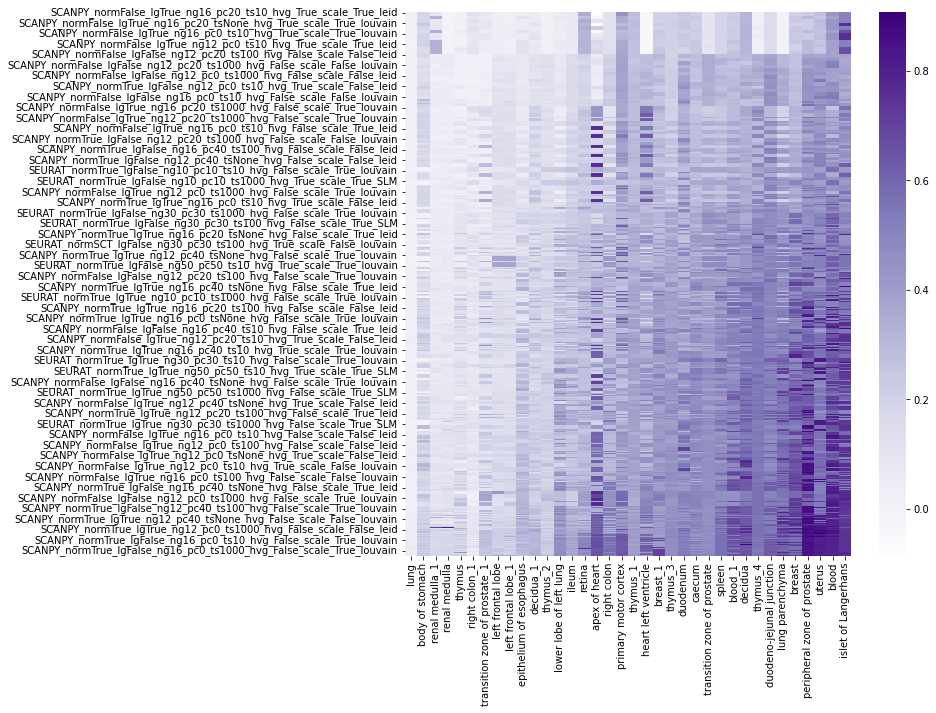

In [11]:
plt.figure(figsize=(10,10))
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.heatmap(ARISEL,cmap='Purples')
plt.savefig('../../figures/7.spatial_architecture/simulations_scores_by_dataset.pdf')

In [252]:
# INTRODUCE SAMPLE_SPECIFIC INFO

In [268]:
sampleinfo=pd.read_csv('../../figures/7.spatial_architecture/simulated_sample_info.csv',index_col=0)
mean_ARI=pd.DataFrame(np.mean(ARI.fillna(0),axis=0),columns=['mean_ARI'])
expe=dict(zip(mean_ARI.index,mean_ARI['mean_ARI']))
sampleinfo['mean_ARI']=sampleinfo.index.map(expe)
sampleinfo=sampleinfo[sampleinfo['mean_ARI']>0]
sampleinfo.index=sampleinfo.index.map(datasetdic)
sampleinfo=sampleinfo.loc[ARISEL.columns,:]

In [356]:
correl=[]
for col in sampleinfo.columns:
    correl.append(np.corrcoef(sampleinfo[col],sampleinfo['mean_ARI'])[0,1])
sampleinfosub=sampleinfosub=sampleinfo.loc[:,sampleinfo.columns[0:5]]

In [372]:
sampleinfosub=sampleinfosub.div(sampleinfosub.max(axis=0),axis=1)

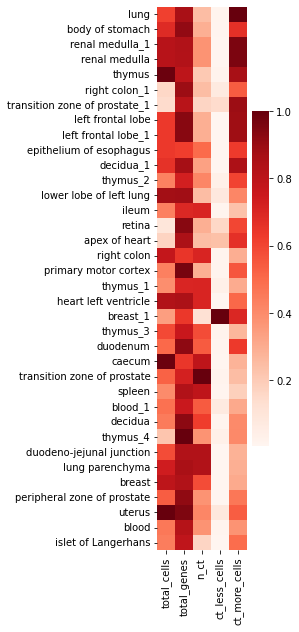

In [373]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(2,10))
sns.heatmap(sampleinfosub,cmap='Reds')
plt.savefig('../../figures/7.spatial_architecture/sampleinfo_all.pdf')

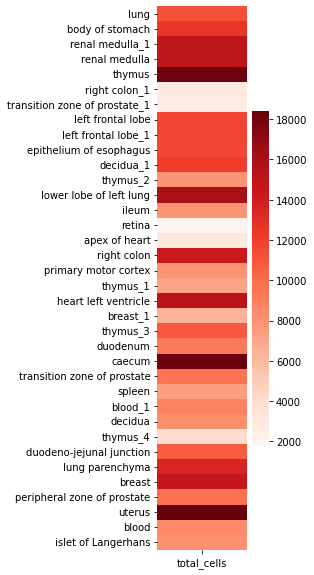

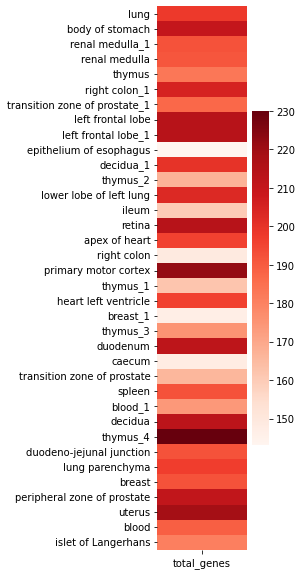

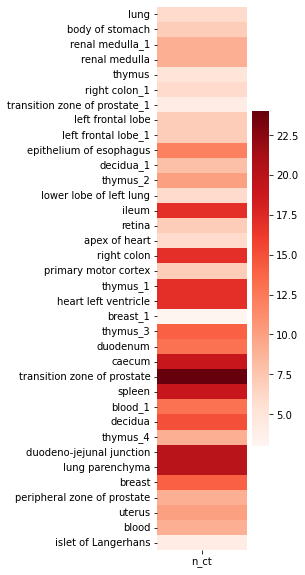

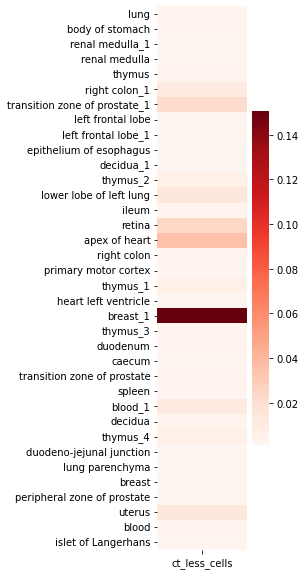

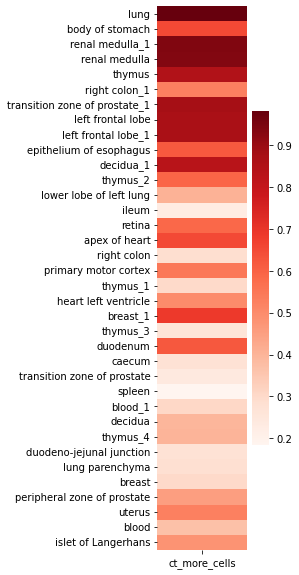

In [366]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
for col in sampleinfosub.columns:
    plt.figure(figsize=(2,10))
    sns.heatmap(sampleinfosub.loc[:,[col]],cmap='Reds')
    plt.savefig('../../figures/7.spatial_architecture/sampleinfo_'+str(col)+'.pdf')
    

In [271]:
ARISELNORM=ARISEL.div(ARISEL.max(axis=0),axis=1)

In [272]:
ARISEL_ranked=ARISEL.rank(axis=0)

In [274]:
order=pd.DataFrame(np.median(ARISEL_ranked,axis=1),index=ARISEL_ranked.index).sort_values(by=0)
ARISEL_ranked_sorted=ARISEL_ranked.loc[order.index,:]

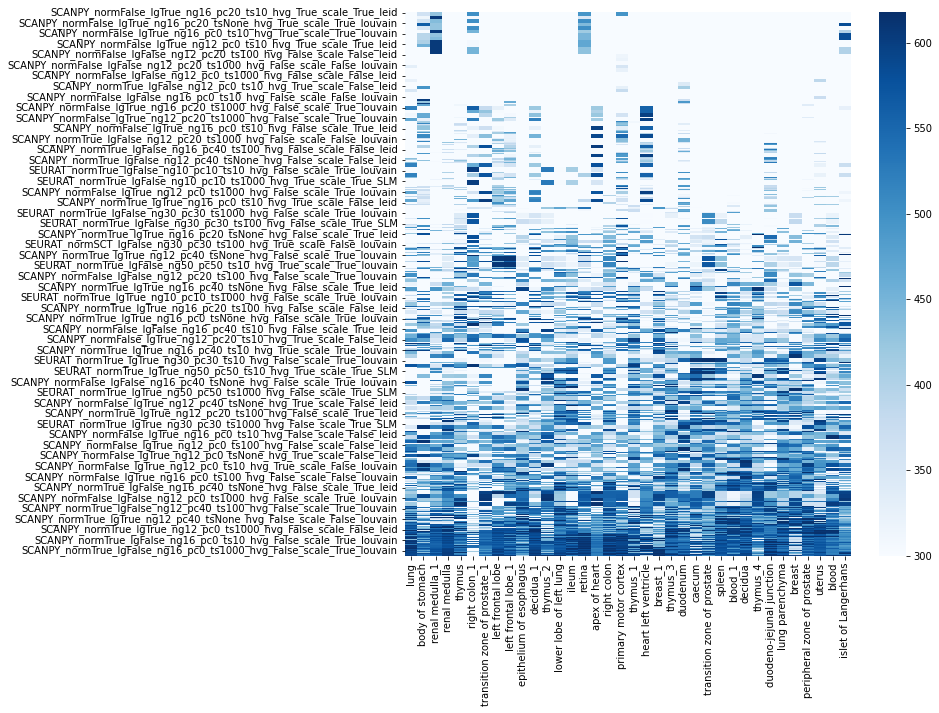

In [574]:
plt.figure(figsize=(10,10))
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.heatmap(ARISEL_ranked,cmap='Blues',vmin=300)
plt.savefig('../../figures/7.spatial_architecture/agreement_in_processing_workflows.pdf')

In [536]:
inverted_ARISEL=ARISEL_ranked.copy()
inverted_ARISEL=ARISEL.shape[0]-inverted_ARISEL
inverted_ARISEL.reset_index(inplace=True)
ranked_stacked=pd.DataFrame(inverted_ARISEL.iloc[:,1:].stack(),columns=['ranking'])
ranked_stacked.reset_index(inplace=True)

(0.0, 617.0)

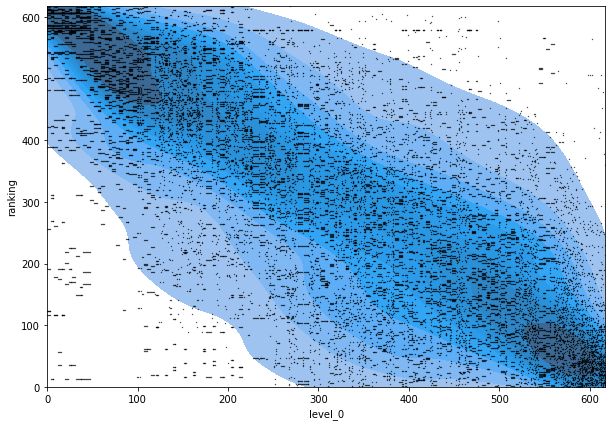

In [569]:
plt.figure(figsize=(10,7))
sns.kdeplot(x=ranked_stacked['level_0'], y=ranked_stacked['ranking'], fill=True)
plt.scatter(x=ranked_stacked['level_0'],y=ranked_stacked['ranking'],s=0.1,c='black')
plt.xlim([0,ranked_stacked['level_0'].max()])
plt.ylim([0,ranked_stacked['level_0'].max()])

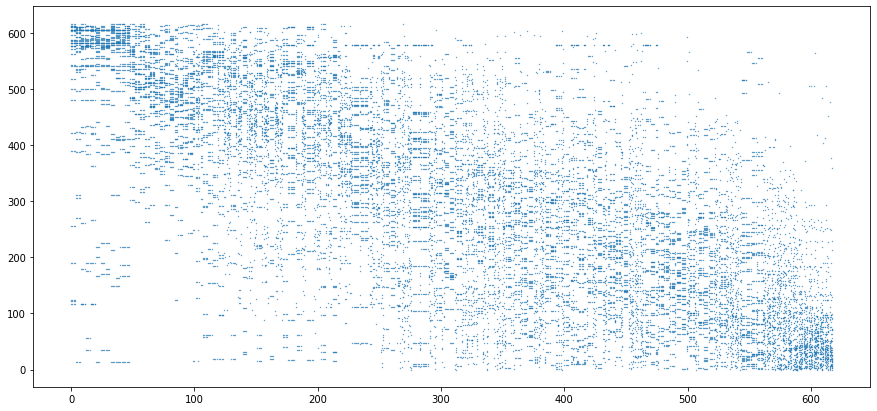

In [564]:
plt.figure(figsize=(15,7))
plt.scatter(x=ranked_stacked['level_0'],y=ranked_stacked['ranking'],s=0.1)

# Perturbation experiment, based on best workflow

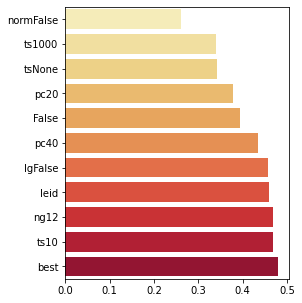

In [136]:
dat=[el.split('_') for el in ARISEL.index]
metadata=pd.DataFrame(dat)
metadata_nam=metadata.copy()
best_option=metadata.iloc[-1:,:] #### we select the best or not
for col in metadata.columns:
    metadata.loc[:,col]=~metadata.loc[:,col].isin(best_option.iloc[:,col])*1
ARICLOSE=ARISEL.loc[list(np.sum(metadata,axis=1)==1),:]
metadata_close=metadata.loc[list(np.sum(metadata,axis=1)==1),:]
metadata_namclose=metadata_nam.loc[list(np.sum(metadata,axis=1)==1),:]
newnam=[]
for ind in metadata_close.index:
    newnam.append(pd.DataFrame(metadata_namclose.loc[ind,list(metadata_close.loc[ind,:]==1)]).iloc[0,0])
ARICLOSE=pd.concat([ARICLOSE,ARISEL.iloc[-1:,:]])
newnam.append('best')
ARICLOSE.index=newnam
selected=pd.DataFrame(np.sum(metadata,axis=1)==1)
selected.loc[selected.iloc[:,0]==1,:].index
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(4,5))
sns.barplot(y=ARICLOSE.index,x=list(ARICLOSE.mean(axis=1)),palette='YlOrRd')
plt.savefig('../../figures/7.spatial_architecture/perturbation_test_simulated_barplot.pdf')

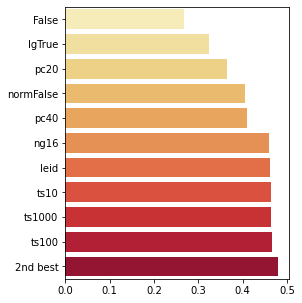

In [139]:
dat=[el.split('_') for el in ARISEL.index]
metadata=pd.DataFrame(dat)
metadata_nam=metadata.copy()
best_option=metadata.iloc[-2:-1,:] #### we select the best or not
for col in metadata.columns:
    metadata.loc[:,col]=~metadata.loc[:,col].isin(best_option.iloc[:,col])*1
ARICLOSE=ARISEL.loc[list(np.sum(metadata,axis=1)==1),:]
metadata_close=metadata.loc[list(np.sum(metadata,axis=1)==1),:]
metadata_namclose=metadata_nam.loc[list(np.sum(metadata,axis=1)==1),:]
newnam=[]
for ind in metadata_close.index:
    newnam.append(pd.DataFrame(metadata_namclose.loc[ind,list(metadata_close.loc[ind,:]==1)]).iloc[0,0])
ARICLOSE=pd.concat([ARICLOSE,ARISEL.iloc[-1:,:]])
newnam.append('2nd best')
ARICLOSE.index=newnam
selected=pd.DataFrame(np.sum(metadata,axis=1)==1)
selected.loc[selected.iloc[:,0]==1,:].index
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(4,5))
sns.barplot(y=ARICLOSE.index,x=list(ARICLOSE.mean(axis=1)),palette='YlOrRd')
plt.savefig('../../figures/7.spatial_architecture/perturbation_test_simulated_barplot_second_best_workflow.pdf')

<AxesSubplot:>

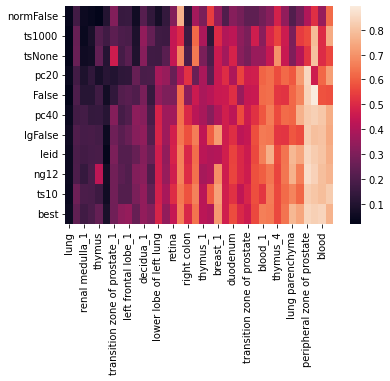

In [121]:
sns.heatmap(ARICLOSE)

# We now build the model

In [440]:
ARISUB=ARISEL.iloc[:,:]
ARISUB=ARISUB.loc[['norm' in s for s in ARISUB.index],:]

In [448]:
ARISUB.index=[s.replace('residuals_','') for s in ARISUB.index]
conditions=pd.DataFrame([s.split('_') for s in ARISUB.index])
conditions.columns=['Software','normalization','log','neighbors','pcs','target_sum','skip','svg','skip2','scale','clustering_alg']

In [516]:
linearized_conditions=[]
for num in range(0,len(ARISUB.columns)):
    cc=ARISUB.columns[num]
    datacon=conditions.copy()
    datacon['dataset']=cc
    datacon['ARI']=list(ARISUB.iloc[:,num])
    linearized_conditions.append(datacon)

In [517]:
linearized_conditions_norm=[]
for num in range(0,len(ARISEL_ranked.columns)):
    cc=ARISUB.columns[num]
    datacon=conditions.copy()
    datacon['dataset']=cc
    datacon['ARI']=list(ARISEL_ranked.iloc[:,num])
    linearized_conditions_norm.append(datacon)

In [518]:
ALLSCORES=pd.concat(linearized_conditions)

In [454]:
ALLSCORES_norm=pd.concat(linearized_conditions_norm)

In [381]:
alsel3=alsel2.copy()
alsel3['ARI_mean']=alsel['ARI_mean']

In [ ]:
sns.kdeplot(
    data=ALLSCORES2,hue='scale',x='ARI',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",bw=0.07)

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.07 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.07 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.07 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/seabo

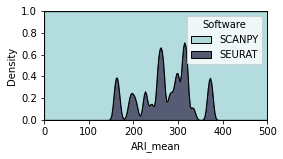

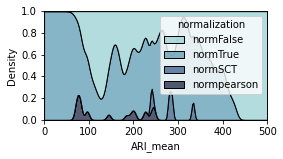

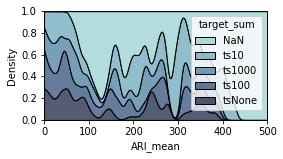

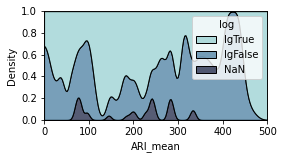

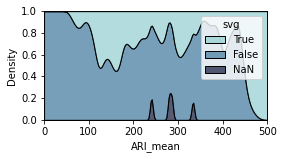

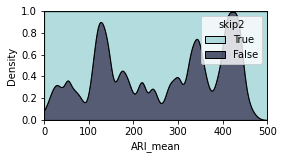

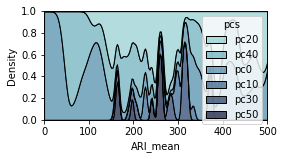

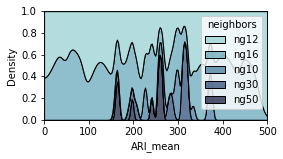

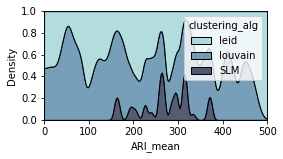

In [405]:
for cl in alsel3.columns[:-1]:
    plt.figure(figsize=(4,2))
    sns.kdeplot(
       data=alsel3,hue=cl,x='ARI_mean',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",bw=0.07)
    
#    sns.violinplot(data=alsel3,y=cl,x='ARI_mean')
#    sns.stripplot(data=alsel3,y=cl,x='ARI_mean',s=0.2,color='black')
#    plt.xlim([-10,600])
#    plt.show()

In [68]:
ALLSCORES['scale']='scale'+ALLSCORES['scale']

In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
categorical_cols=['Software','normalization', 'log', 'neighbors', 'pcs', 'target_sum',  'svg','scale', 'clustering_alg', 'dataset']

X = ALLSCORES[categorical_cols]  # Features
y = ALLSCORES["ARI"]  # Target variable
X = pd.get_dummies(data=X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [71]:
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [72]:
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})

In [74]:
# anova

In [456]:
ALLSCORES['clustering_alg']= [al.split('.')[0] for al in ALLSCORES['clustering_alg']]

In [457]:
ALLSCORES

,Software,normalization,log,neighbors,pcs,target_sum,skip,svg,skip2,scale,clustering_alg,dataset,ARI
0,SCANPY,normFalse,lgTrue,ng16,pc20,ts10,hvg,True,scale,True,leid,lung,0.008352
1,SCANPY,normFalse,lgTrue,ng16,pc20,ts1000,hvg,True,scale,True,leid,lung,0.008352
2,SCANPY,normFalse,lgTrue,ng16,pc20,tsNone,hvg,True,scale,True,leid,lung,0.008352
3,SCANPY,normFalse,lgTrue,ng16,pc20,ts100,hvg,True,scale,True,leid,lung,0.008352
4,SCANPY,normFalse,lgTrue,ng12,pc20,ts100,hvg,True,scale,True,leid,lung,0.006909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,SCANPY,normTrue,lgFalse,ng12,pc0,ts100,hvg,False,scale,True,louvain,islet of Langerhans,0.752745
614,SCANPY,normTrue,lgTrue,ng12,pc0,ts100,hvg,False,scale,True,louvain,islet of Langerhans,0.771449
615,SCANPY,normTrue,lgTrue,ng16,pc0,ts10,hvg,False,scale,True,louvain,islet of Langerhans,0.821528
616,SCANPY,normTrue,lgFalse,ng12,pc0,tsNone,hvg,False,scale,True,louvain,islet of Langerhans,0.752745


In [458]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [519]:
ALLSCORES2=ALLSCORES.copy()#[ALLSCORES['normalization']!='normpearson']

In [520]:
ALLSCORES2.loc[ALLSCORES2['normalization']!='normTrue','target_sum']='NaN'
ALLSCORES2.loc[ALLSCORES2['normalization']=='normpearson','log']='NaN'
ALLSCORES2.loc[ALLSCORES2['normalization']=='normSCT','log']='NaN'
ALLSCORES2.loc[ALLSCORES2['normalization']=='normSCT','svg']='NaN'

In [521]:
ALLSCORES2.groupby('scale').count()

,Software,normalization,log,neighbors,pcs,target_sum,skip,svg,skip2,clustering_alg,dataset,ARI
scale,,,,,,,,,,,,
False,9720,9720,9720,9720,9720,9720,9720,9720,9720,9720,9720,9720
True,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528


In [522]:
ALLSCORES['normalization'].unique()

array(['normFalse', 'normTrue', 'normSCT', 'normpearson'], dtype=object)

In [523]:
ALLSCORES2

,Software,normalization,log,neighbors,pcs,target_sum,skip,svg,skip2,scale,clustering_alg,dataset,ARI
0,SCANPY,normFalse,lgTrue,ng16,pc20,NaN,hvg,True,scale,True,leid,lung,0.008352
1,SCANPY,normFalse,lgTrue,ng16,pc20,NaN,hvg,True,scale,True,leid,lung,0.008352
2,SCANPY,normFalse,lgTrue,ng16,pc20,NaN,hvg,True,scale,True,leid,lung,0.008352
3,SCANPY,normFalse,lgTrue,ng16,pc20,NaN,hvg,True,scale,True,leid,lung,0.008352
4,SCANPY,normFalse,lgTrue,ng12,pc20,NaN,hvg,True,scale,True,leid,lung,0.006909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,SCANPY,normTrue,lgFalse,ng12,pc0,ts100,hvg,False,scale,True,louvain,islet of Langerhans,0.752745
614,SCANPY,normTrue,lgTrue,ng12,pc0,ts100,hvg,False,scale,True,louvain,islet of Langerhans,0.771449
615,SCANPY,normTrue,lgTrue,ng16,pc0,ts10,hvg,False,scale,True,louvain,islet of Langerhans,0.821528
616,SCANPY,normTrue,lgFalse,ng12,pc0,tsNone,hvg,False,scale,True,louvain,islet of Langerhans,0.752745


In [524]:
ALLSCORES2['normalization'].unique()

array(['normFalse', 'normTrue', 'normSCT', 'normpearson'], dtype=object)

In [531]:
formula = 'ARI ~  Software + normalization + log + neighbors + pcs+ target_sum + dataset + scale + svg + clustering_alg'

# Fit the ANOVA model
model = ols(formula, data=ALLSCORES2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table to see the effects of each variable
print(anova_table)

                    sum_sq       df            F         PR(>F)
Software          0.003135      1.0     0.410758   5.215981e-01
normalization     0.009405      3.0     0.410758   5.215981e-01
log               5.015361      1.0   657.160428  6.920079e-141
neighbors         0.012539      4.0     0.410758   5.215981e-01
pcs               0.015674      5.0     0.410758   5.215981e-01
target_sum        0.623550      3.0    27.234510   1.529451e-17
dataset         318.008115     35.0  1190.527365   0.000000e+00
scale            12.765833      1.0  1672.701199   0.000000e+00
svg               1.218054      1.0   159.601059   2.448399e-36
clustering_alg    0.196075      2.0    12.845829   2.676249e-06
Residual         85.339533  11182.0          NaN            NaN


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


In [529]:
performance=pd.DataFrame(anova_table).sort_values(by='F')

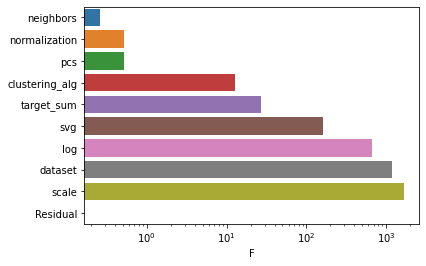

In [530]:
sns.barplot(y=performance.index,x=performance['F'])
plt.xscale('log')

In [87]:
ALLSCORES=ALLSCORES.sort_values(by='ARI')

In [88]:
ALLSCORES

,Software,normalization,log,neighbors,pcs,target_sum,skip,svg,skip2,scale,clustering_alg,dataset,ARI
106,SCANPY,normTrue,lgFalse,ng16,pc0,ts10,hvg,True,scale,scaleFalse,louvain,retina,1.0
269,SCANPY,normTrue,lgTrue,ng16,pc40,ts10,hvg,False,scale,scaleFalse,louvain,right colon,1.0
35,SCANPY,normFalse,lgTrue,ng12,pc40,tsNone,hvg,True,scale,scaleTrue,leid,thymus,2.5
34,SCANPY,normFalse,lgTrue,ng12,pc40,ts1000,hvg,True,scale,scaleTrue,leid,thymus,2.5
33,SCANPY,normFalse,lgTrue,ng12,pc40,ts10,hvg,True,scale,scaleTrue,leid,thymus,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,SCANPY,normTrue,lgTrue,ng16,pc40,tsNone,hvg,False,scale,scaleTrue,louvain,thymus,618.0
609,SCANPY,normTrue,lgTrue,ng12,pc0,ts10,hvg,False,scale,scaleTrue,louvain,retina,618.0
542,SCANPY,normTrue,lgTrue,ng16,pc40,ts10,hvg,False,scale,scaleTrue,leid,lower lobe of left lung,618.0
609,SCANPY,normTrue,lgTrue,ng12,pc0,ts10,hvg,False,scale,scaleTrue,louvain,lung,618.0


In [110]:
alld=[n.split('_') for n in ARISEL.index]
allso=pd.DataFrame(alld)
allso.columns=['Software','normalization', 'log', 'neighbors', 'pcs', 'target_sum','skip', 'svg','scale','skip2', 'clustering_alg', ]
allso['ARI_mean']=list(np.mean(ARISEL_ranked.iloc[:,:],axis=1))
allso=allso.sort_values(by='ARI_mean')

In [111]:
alsel=allso.loc[['.' not in c   for c in  allso['clustering_alg']],:]

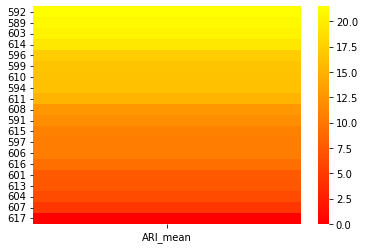

In [580]:
sns.heatmap(alsel.tail(20).loc[:,['ARI_mean']],cmap='autumn')
plt.savefig('../../figures/7.spatial_architecture/top20_ranks_heatmap.pdf')

In [136]:
alsel['ARI_mean']=ARISEL.shape[0]-alsel['ARI_mean']#np.max(alsel['ARI_mean'])

In [175]:
alsel.tail(3).loc[:,['target_sum','log','skip2','neighbors','clustering_alg']]

,target_sum,log,skip2,neighbors,clustering_alg
604,ts1000,lgFalse,True,ng12,leid
607,tsNone,lgFalse,True,ng12,leid
617,ts100,lgTrue,True,ng16,louvain


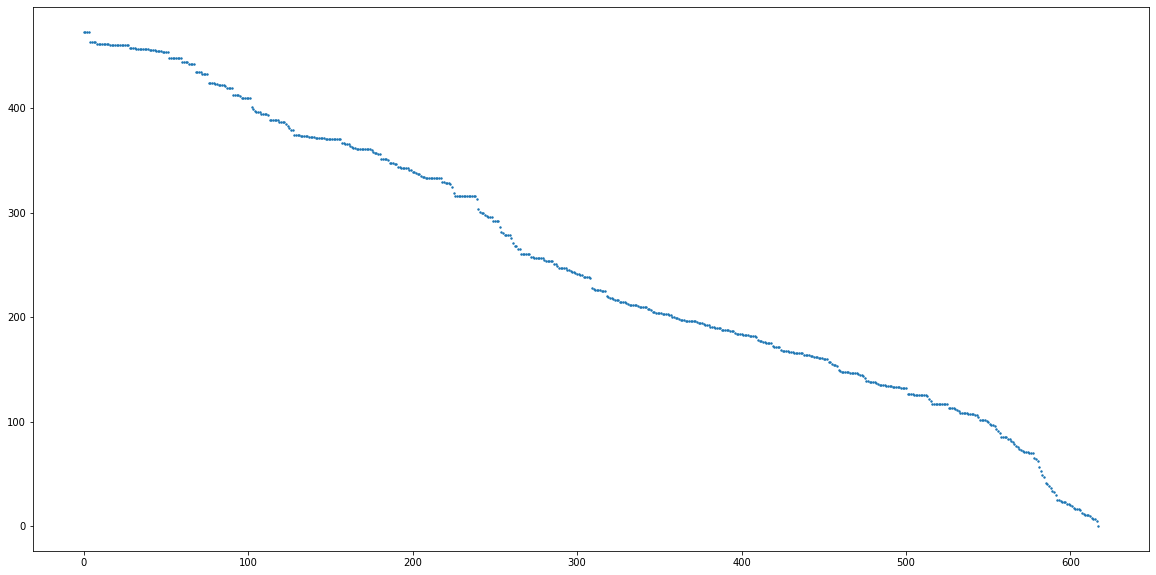

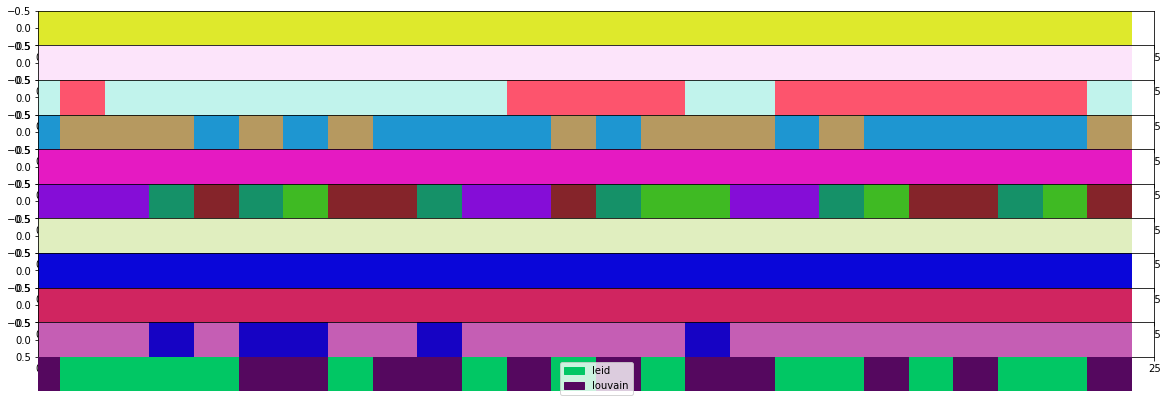

In [286]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
plt.scatter(range(0,alsel.shape[0]),alsel['ARI_mean'],s=2)
fig, ax = plt.subplots(figsize=(20,7),nrows=len(alsel.columns[:-1]), ncols=1)
nun=0
for cols in alsel.columns[:-1]:
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
#    print(cols)
    # Generate a list of 50 random hex colors
    hex_colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(50)]

    # Convert hex colors to RGB in the range from 0 to 1 and store them in a matrix
    rgb_colors = []
    for hex_color in hex_colors:
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))
        rgb_colors.append(rgb)
    data=list(alsel.tail(25)[cols])

    colos=rgb_colors
    categories={}
    nu=0
    for cat in np.unique(data):
        categories[cat]=colos[nu]
        nu=nu+1

    colors = np.array([categories[category] for category in data])

    # Create a figure and axis

    # Plot the 1D color mesh using imshow
    ax[nun].imshow(colors.reshape(1, -1, 3),aspect='auto')
    plt.axis('off')
    patches =[mpatches.Patch(color=categories[i],label=i) for i in categories.keys()]
    plt.legend(handles=patches,loc=9)
    # Set the axis limits
    ax[nun].set_xlim(0, len(data))
    #ax.set_ylim(0, 800)

    # Add a colorbar for reference
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=None, norm=None), ax=ax, orientation='horizontal')
    plt.axis('off')
    nun=nun+1
    # Show the plot
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../figures/7.spatial_architecture/top_processing_workflows.pdf')
plt.show()


In [335]:
alsel2=alsel.loc[:,['Software','normalization','target_sum','log','svg','skip2','pcs','neighbors','clustering_alg']]

In [336]:
alsel2.loc[alsel2['normalization']!='normTrue','target_sum']='NaN'
alsel2.loc[alsel2['normalization']=='normpearson','log']='NaN'
alsel2.loc[alsel2['normalization']=='normSCT','log']='NaN'
alsel2.loc[alsel2['normalization']=='normSCT','svg']='NaN'

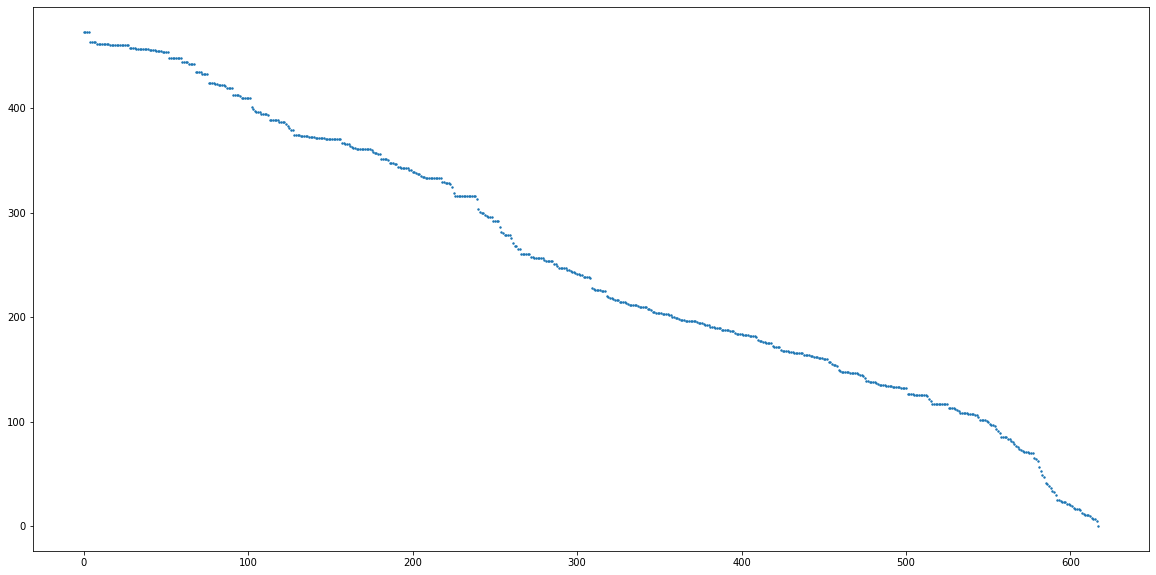

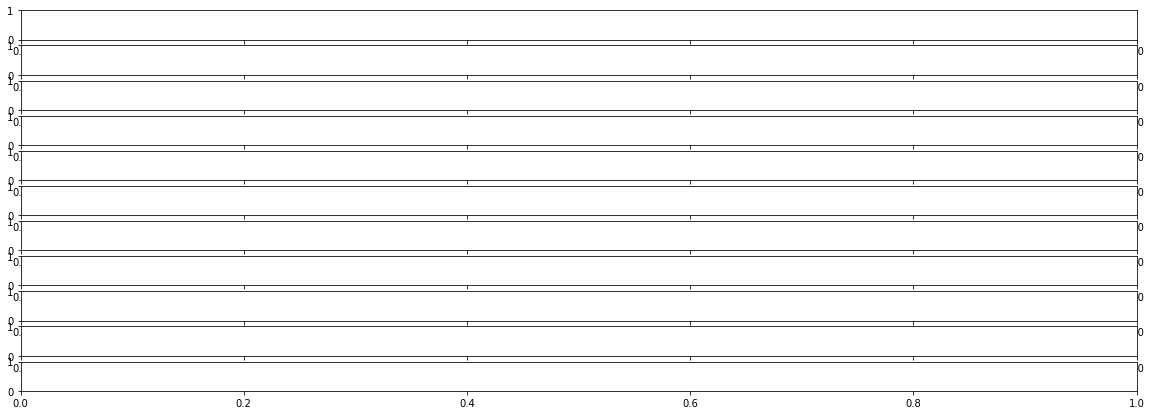

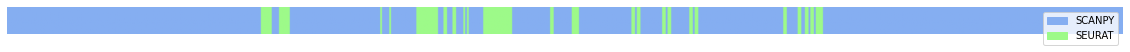

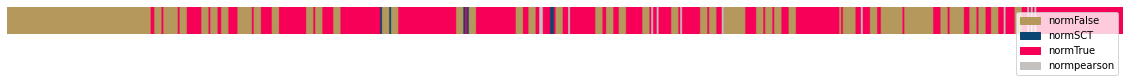

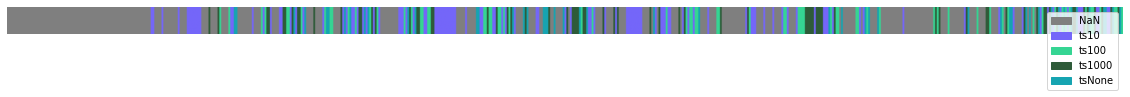

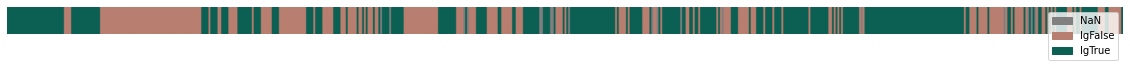

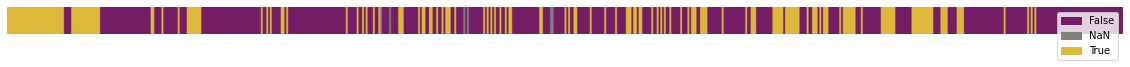

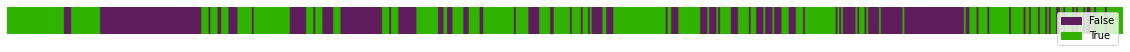

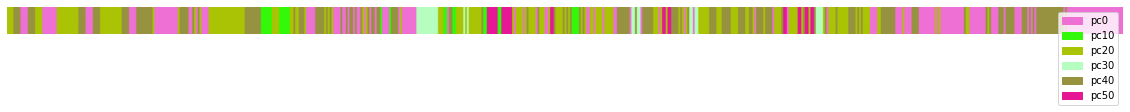

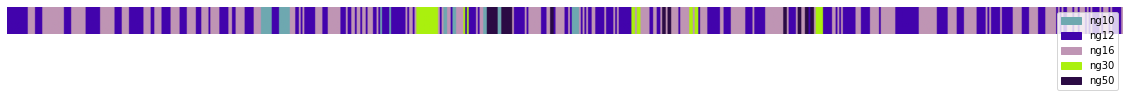

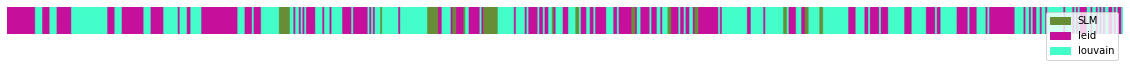

In [337]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
plt.scatter(range(0,alsel.shape[0]),alsel['ARI_mean'],s=2)
fig, ax = plt.subplots(figsize=(20,7),nrows=len(alsel.columns[:-1]), ncols=1)

for cols in alsel2.columns[:]:
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
#    print(cols)
    # Generate a list of 50 random hex colors
    hex_colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(50)]
    fig, ax = plt.subplots(figsize=(20,0.5),nrows=1, ncols=1)
    nun=0
    # Convert hex colors to RGB in the range from 0 to 1 and store them in a matrix
    rgb_colors = []
    for hex_color in hex_colors:
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))
        rgb_colors.append(rgb)
    data=list(alsel2[cols])

    colos=rgb_colors
    categories={}
    nu=0
    for cat in np.unique(data):
        if cat=='NaN':
            categories[cat]=(0.5,0.5,0.5)
        else:
            categories[cat]=colos[nu]
        nu=nu+1

    colors = np.array([categories[category] for category in data])

    # Create a figure and axis

    # Plot the 1D color mesh using imshow
    ax.imshow(colors.reshape(1, -1, 3),aspect='auto')
    plt.axis('off')
    patches =[mpatches.Patch(color=categories[i],label=i) for i in categories.keys()]
    plt.legend(handles=patches,loc=1)
    # Set the axis limits
    ax.set_xlim(0, len(data))
    #ax.set_ylim(0, 800)

    # Add a colorbar for reference
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=None, norm=None), ax=ax, orientation='horizontal')
    plt.axis('off')
    nun=nun+1
    # Show the plot
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../figures/7.spatial_architecture/all_processing_workflows.pdf')
plt.show()


In [348]:
alsel2

,Software,normalization,target_sum,log,svg,skip2,pcs,neighbors,clustering_alg
4,SCANPY,normFalse,NaN,lgTrue,True,True,pc20,ng12,leid
5,SCANPY,normFalse,NaN,lgTrue,True,True,pc20,ng12,leid
6,SCANPY,normFalse,NaN,lgTrue,True,True,pc20,ng12,leid
7,SCANPY,normFalse,NaN,lgTrue,True,True,pc20,ng12,leid
35,SCANPY,normFalse,NaN,lgTrue,True,True,pc40,ng12,leid
...,...,...,...,...,...,...,...,...,...
601,SCANPY,normTrue,ts100,lgFalse,False,True,pc0,ng12,leid
613,SCANPY,normTrue,ts100,lgFalse,False,True,pc0,ng12,louvain
604,SCANPY,normTrue,ts1000,lgFalse,False,True,pc0,ng12,leid
607,SCANPY,normTrue,tsNone,lgFalse,False,True,pc0,ng12,leid


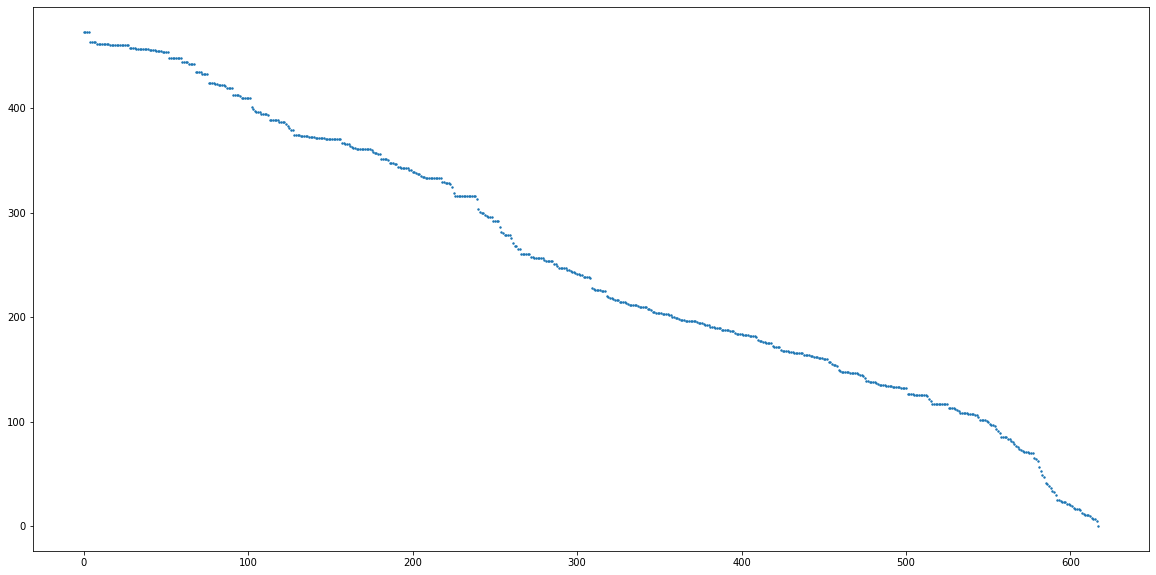

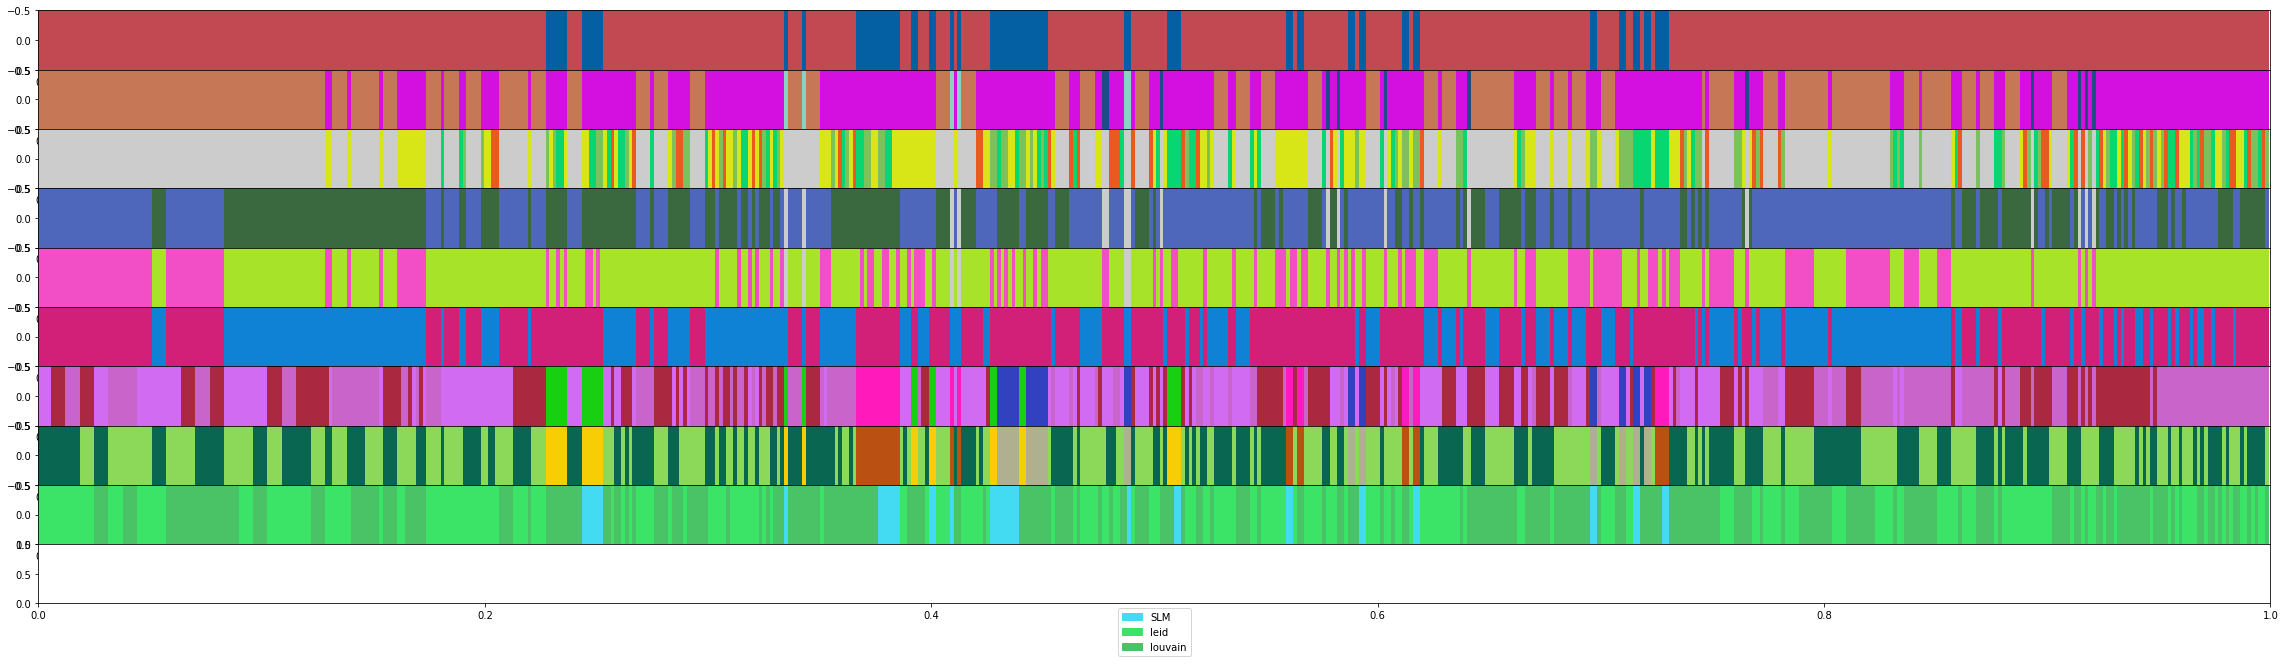

In [353]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
plt.scatter(range(0,alsel.shape[0]),alsel['ARI_mean'],s=2)
fig, ax = plt.subplots(figsize=(40,12),nrows=len(alsel.columns[:-1]), ncols=1)
nun=0
for cols in alsel2.columns[:]:
    import matplotlib.pyplot as plt
    import numpy as np
    import random
    import matplotlib
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
#    print(cols)
    # Generate a list of 50 random hex colors
    hex_colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(50)]

    # Convert hex colors to RGB in the range from 0 to 1 and store them in a matrix
    rgb_colors = []
    for hex_color in hex_colors:
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))
        rgb_colors.append(rgb)
    data=list(alsel2[cols])

    colos=rgb_colors
    categories={}
    nu=0
    for cat in np.unique(data):
        if cat=='NaN':
            categories[cat]=(0.8,0.8,0.8)
        else:
            categories[cat]=colos[nu]
        nu=nu+1

    colors = np.array([categories[category] for category in data])

    # Create a figure and axis

    # Plot the 1D color mesh using imshow
    ax[nun].imshow(colors.reshape(1, -1, 3),aspect='auto')
    plt.axis('off')
    patches =[mpatches.Patch(color=categories[i],label=i) for i in categories.keys()]
    plt.legend(handles=patches,loc=9)
    # Set the axis limits
    ax[nun].set_xlim(0, len(data))
    #ax.set_ylim(0, 800)

    # Add a colorbar for reference
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=None, norm=None), ax=ax, orientation='horizontal')
    plt.axis('off')
    nun=nun+1
    # Show the plot
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../figures/7.spatial_architecture/all_processing_workflows.pdf')
plt.show()


In [252]:
lenar=200
arrayall=np.zeros([lenar,len(data),3])

In [253]:
for e in range(0,lenar):
    arrayall[e,:,:] = [categories[category] for category in data]

# Check bad datasets

In [ ]:
ARISEL=ARI.loc[:,dats].fillna(0)
checking_bad_datasets=pd.DataFrame(ARISEL.mean(axis=0)).sort_values(by=0).index
dt=checking_bad_datasets[-1]
adata=sc.read('../../data/scRNAseq_for_simulations_Xenium_like/'+dt+'/adata.h5ad')
mincounts=10
mingenes=3
adata.layers['raw']=adata.X.copy()
sc.pp.filter_cells(adata,min_counts=mincounts)
sc.pp.filter_cells(adata,min_genes=mingenes)
adata.raw=adata
adata.layers['raw']=adata.X.copy()
sc.pp.normalize_total(adata, target_sum=100)
sc.pp.log1p(adata)
sc.pp.scale(adata)
#remove nans, inf and -ind
adata.X=np.array(adata.to_df().fillna(0))
adata.X[adata.X==-np.inf]=0
adata.X[adata.X==np.inf]=0
#    adata.X.fillna(0, inplace=True)
sc.pp.pca(adata)
print(adata.shape)
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=0)
#    sc.tl.leiden(adata,resolution=2.2,key_added='leiden_2_2')
default_resol=0.3
resol=default_resol
sc.tl.leiden(adata,resolution=resol,key_added='leiden_1_4')
sc.tl.umap(adata)
default_resol=0.37
resol=default_resol
sc.tl.leiden(adata,resolution=resol,key_added='leiden_1_4')
sc.pl.umap(adata,color=['leiden_1_4','cell_type'])